In [1]:
!pip install opencv-python
from os import listdir
from os.path import isfile,join

mypath="C:\\Users\\Gangadhar Giri\\Flip Robo\\dataset\\flipkart_model\\trousersvsjeans\\images\\"

file_names=[f for f in listdir(mypath) if isfile(join(mypath,f))]

print(str(len(file_names))+' images loaded')

240 images loaded


In [2]:
import cv2
import numpy as np
import sys
import os
import shutil

jean_count=0
trouser_count=0
training_size=100
test_size=20
training_images=[]
training_labels=[]
test_images=[]
test_labels=[]
size=150
jean_dir_train="./flipkart_model/train/jeans/"
trouser_dir_train="./flipkart_model/train/trousers/"
jean_dir_val="./flipkart_model/validation/jeans/"
trouser_dir_val="./flipkart_model/validation/trousers/"

def make_dir(directory):
    if os.path.exists(directory):
        shutil.rmtree(directory)
    os.makedirs(directory)

make_dir(jean_dir_train)
make_dir(trouser_dir_train)
make_dir(jean_dir_val)
make_dir(trouser_dir_val)

def getZeros(number):
    if (number>10 and number<100):
        return "0"
    if (number<10):
        return "00"
    else:
        return ""

for i,file in enumerate(file_names):
    if file_names[i][0]=="j":
        jean_count+=1
        image=cv2.imread(mypath+file)
        print(mypath+file)
        image=cv2.resize(image,(size,size),interpolation=cv2.INTER_AREA)
        if jean_count<= training_size:
            training_images.append(image)
            training_labels.append(1)
            zeros=getZeros(jean_count)
            cv2.imwrite(jean_dir_train+"jean"+str(zeros)+str(jean_count)+".jpg",image)
        if jean_count>training_size and jean_count<=training_size+test_size:
            test_images.append(image)
            test_labels.append(1)
            zeros=getZeros(jean_count-100)
            cv2.imwrite(jean_dir_val+"jean"+str(zeros)+str(jean_count-100)+".jpg",image)
    if file_names[i][0]=="t":
        trouser_count+=1
        image=cv2.imread(mypath+file)
        image=cv2.resize(image,(size,size),interpolation=cv2.INTER_AREA)
        if trouser_count<= training_size:
            training_images.append(image)
            training_labels.append(0)
            zeros=getZeros(trouser_count)
            cv2.imwrite(trouser_dir_train+"trouser"+str(zeros)+str(trouser_count)+".jpg",image)
        if trouser_count>training_size and trouser_count<=training_size+test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros=getZeros(trouser_count-100)
            cv2.imwrite(trouser_dir_val+"trouser"+str(zeros)+str(trouser_count-100)+".jpg",image)
    
    if jean_count==training_size+test_size and trouser_count==training_size+test_size:
        break

print("Training and Test Data Extraction Complete")

C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans0.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans1.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans10.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans100.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans101.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans102.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans103.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans104.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans105.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans106.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousers

C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans82.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans83.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans84.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans85.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans86.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans87.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans88.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans89.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans9.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjeans\images\jeans90.jpeg
C:\Users\Gangadhar Giri\Flip Robo\dataset\flipkart_model\trousersvsjean

In [3]:
np.savez('trousers_vs_jeans_training_data.npz',np.array(training_images))
np.savez('trousers_vs_jeans_training_labels.npz',np.array(training_labels))
np.savez('trousers_vs_jeans_test_data.npz',np.array(test_images))
np.savez('trousers_vs_jeans_test_labels.npz',np.array(test_labels))

In [4]:
import numpy as np

def load_data_training_and_test(datasetname):
    npzfile=np.load(datasetname+"_training_data.npz")
    train=npzfile['arr_0']
    
    npzfile=np.load(datasetname+"_training_labels.npz")
    train_labels=npzfile['arr_0']

    npzfile=np.load(datasetname+"_test_data.npz")
    test=npzfile['arr_0']
    
    npzfile=np.load(datasetname+"_test_labels.npz")
    test_labels=npzfile['arr_0']

    return(train,train_labels),(test,test_labels)

In [5]:
for i in range(1,201):
    random=np.random.randint(0,len(training_images))
    cv2.imshow("image_"+str(i),training_images[random])
    if training_labels[random]==0:
        print(str(i)+" - Trouser")
    else:
        print(str(i)+" - Jean")
    cv2.waitKey(1)
cv2.destroyAllWindows()

1 - Jean
2 - Jean
3 - Jean
4 - Jean
5 - Jean
6 - Trouser
7 - Jean
8 - Jean
9 - Trouser
10 - Jean
11 - Trouser
12 - Trouser
13 - Trouser
14 - Trouser
15 - Jean
16 - Jean
17 - Jean
18 - Jean
19 - Trouser
20 - Trouser
21 - Trouser
22 - Trouser
23 - Trouser
24 - Trouser
25 - Jean
26 - Trouser
27 - Trouser
28 - Trouser
29 - Jean
30 - Trouser
31 - Trouser
32 - Trouser
33 - Jean
34 - Trouser
35 - Trouser
36 - Jean
37 - Trouser
38 - Jean
39 - Trouser
40 - Trouser
41 - Trouser
42 - Jean
43 - Jean
44 - Trouser
45 - Jean
46 - Trouser
47 - Trouser
48 - Jean
49 - Jean
50 - Jean
51 - Trouser
52 - Jean
53 - Jean
54 - Trouser
55 - Trouser
56 - Trouser
57 - Jean
58 - Trouser
59 - Trouser
60 - Jean
61 - Jean
62 - Trouser
63 - Trouser
64 - Jean
65 - Trouser
66 - Trouser
67 - Jean
68 - Jean
69 - Jean
70 - Trouser
71 - Jean
72 - Jean
73 - Jean
74 - Jean
75 - Jean
76 - Trouser
77 - Jean
78 - Trouser
79 - Trouser
80 - Jean
81 - Trouser
82 - Jean
83 - Jean
84 - Trouser
85 - Trouser
86 - Trouser
87 - Jean
88 -

In [6]:
(x_train,y_train),(x_test,y_test)=load_data_training_and_test("trousers_vs_jeans")

y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(200, 150, 150, 3)
(200, 1)
(40, 150, 150, 3)
(40, 1)


In [7]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils.vis_utils import plot_model
import os

batch_size=16
epochs=25

img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]
input_shape=(img_rows,img_cols,3)

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

print(model.summary())

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [8]:
history=model.fit(x_train,y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test,y_test),
                  shuffle=True)

model.save("./flipkart_model/trousers_vs_jeans.h5")

scores=model.evaluate(x_test,y_test,verbose=1)
print("Test Loss is",scores[0])
print("Test Accuracy is",scores[1])

Epoch 1/25
13/13 [==============================] - 6s 496ms/step - loss: 0.7763 - accuracy: 0.4800 - val_loss: 0.6694 - val_accuracy: 0.5250
Epoch 2/25
13/13 [==============================] - 6s 441ms/step - loss: 0.7521 - accuracy: 0.6050 - val_loss: 0.6574 - val_accuracy: 0.7250
Epoch 3/25
13/13 [==============================] - 6s 483ms/step - loss: 0.6432 - accuracy: 0.6450 - val_loss: 0.7129 - val_accuracy: 0.5000
Epoch 4/25
13/13 [==============================] - 6s 452ms/step - loss: 0.5471 - accuracy: 0.7650 - val_loss: 0.6565 - val_accuracy: 0.5750
Epoch 5/25
13/13 [==============================] - 6s 455ms/step - loss: 0.4708 - accuracy: 0.7650 - val_loss: 0.6634 - val_accuracy: 0.6500
Epoch 6/25
13/13 [==============================] - 6s 472ms/step - loss: 0.3404 - accuracy: 0.8600 - val_loss: 0.4150 - val_accuracy: 0.8250
Epoch 7/25
13/13 [==============================] - 6s 448ms/step - loss: 0.3385 - accuracy: 0.8900 - val_loss: 0.3109 - val_accuracy: 0.8500
Epoch 

In [9]:
import cv2
import numpy as np
from keras.models import load_model

classifier=load_model("./flipkart_model/trousers_vs_jeans.h5")

def draw_test(name,pred,input_im):
    BLACK=[0,0,0]
    if pred=="[0]":
        pred="trouser"
    if pred=="[1]":
        pred="jean"
    expanded_image=cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0],cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image,str(pred),(252,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
    cv2.imshow(name,expanded_image)
    
for i in range(0,40):
    rand=np.random.randint(0,len(x_test))
    input_im=x_test[rand]

    imageL=cv2.resize(input_im,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
    cv2.imshow("Test_Image",imageL)
    
    input_im=input_im.reshape(1,150,150,3)
    
    res=str(classifier.predict_classes(input_im,1,verbose=0)[0])
    
    draw_test("Prediction",res,imageL)
    cv2.waitKey(1)
cv2.destroyAllWindows()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [10]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape=[150,150,3]
img_width=150
img_height=150

nb_train_samples=200
nb_validation_samples=40

batch_size=16
epochs=25

train_data_dir='./flipkart_model/train'
validation_data_dir='./flipkart_model/validation'

validation_datagen=ImageDataGenerator(
    rescale=1./255)

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator=train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True)

validation_generator=validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
12/12 [==============================] - 8s 638ms/step - loss: 0.7953 - accuracy: 0.5435 - val_loss: 2.0760 - val_accuracy: 0.3750
Epoch 2/25
12/12 [==============================] - 6s 525ms/step - loss: 0.7782 - accuracy: 0.5217 - val_loss: 0.6883 - val_accuracy: 0.6250
Epoch 3/25
12/12 [==============================] - 7s 567ms/step - loss: 0.6860 - accuracy: 0.5761 - val_loss: 0.7303 - val_accuracy: 0.3750
Epoch 4/25
12/12 [==============================] - 7s 543ms/step - loss: 0.6617 - accuracy: 0.5870 - val_loss: 0.8313 - val_accuracy: 0.4062
Epoch 5/25
12/12 [==============================] - 7s 582ms/step - loss: 0.6871 - accuracy: 0.5761 - val_loss: 0.6857 - val_accuracy: 0.5625
Epoch 6/25
12/12 [==============================] - 6s 540ms/step - loss: 0.6157 - accuracy: 0.6739 - val_loss: 0.6343 - val_accuracy: 0.5938
Epoch 7/25
12/12 [==============================] - 7s 566ms/step - loss

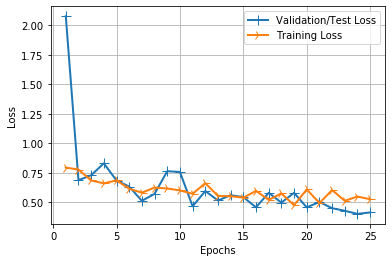

In [13]:
import matplotlib.pyplot as plt

history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

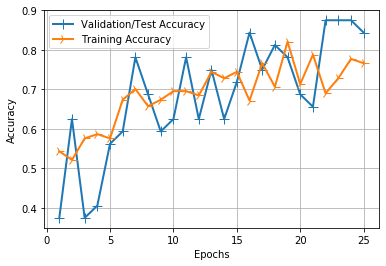

In [14]:
import matplotlib.pyplot as plt

history_dict=history.history

acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(acc_values)+1)

line1=plt.plot(epochs,val_acc_values,label='Validation/Test Accuracy')
line2=plt.plot(epochs,acc_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()